In [1]:
import urllib.request
urllib.request.urlretrieve("https://gitlab.com/mateusbatista4/ml-data/-/raw/main/flood/test.csv?inline=false", "test.csv")
urllib.request.urlretrieve("https://gitlab.com/mateusbatista4/ml-data/-/raw/main/flood/train.csv?inline=false", "train.csv")


('train.csv', <http.client.HTTPMessage at 0x784be5535b70>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv")

In [ ]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
corr_matrix = train.corr()
corr_matrix["FloodProbability"].sort_values(ascending=False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                -0.000184
Name: FloodProbability, dtype: f

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_distribution(feature, df):
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature],  color='skyblue', edgecolor='black')
  plt.xlabel('Valores')
  plt.ylabel('Frequência')
  plt.title('Distribuição da coluna {}'.format(feature))
  plt.grid(True)
  plt.show()

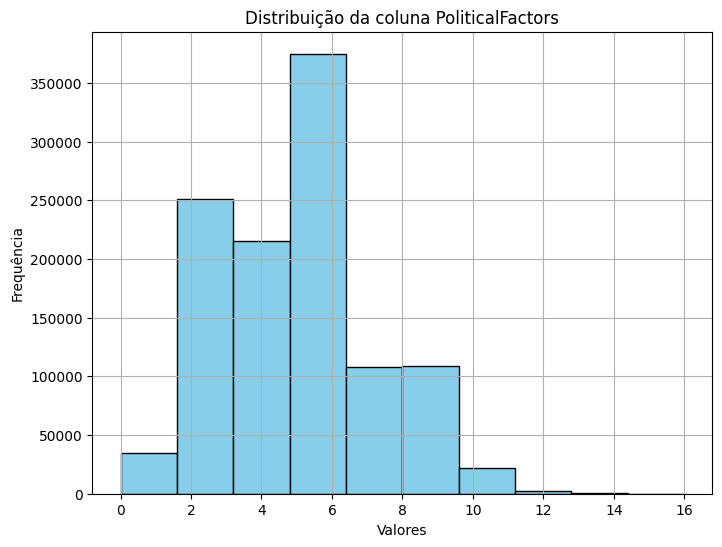

In [ ]:
plot_distribution("PoliticalFactors",train)

In [3]:
from sklearn.preprocessing import MinMaxScaler

## FEATURE SCALING
scaler = MinMaxScaler()

features_normalized = scaler.fit_transform(train)

train = pd.DataFrame(features_normalized, columns=train.columns)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['FloodProbability','id' ]), train['FloodProbability'], test_size=0.2, random_state=42)

In [5]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score


print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00208
Coefficient of determination: 0.84


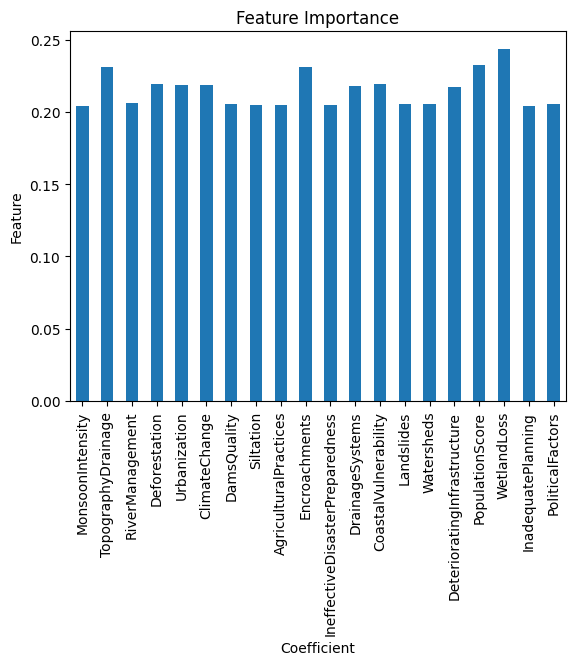

In [9]:
coefficients = pd.Series(regr.coef_, index=X_train.columns)
coefficients.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

regr = linear_model.LinearRegression(fit_intercept=True)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

r2_scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=kf)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f"Mean R^2: {mean_r2:.2f}")
print(f"Standard Deviation of R^2: {std_r2:.2f}")
r2_scores

Mean R^2: 0.84
Standard Deviation of R^2: 0.00


array([0.84564641, 0.84522726, 0.84429531, 0.84447853, 0.84514693])